In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import KFold,train_test_split
from sklearn.metrics import log_loss, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from keras.layers import Dense,Dropout
from keras.models import Model, Sequential
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso,Ridge
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from keras.layers.advanced_activations import ReLU, PReLU
from keras.optimizers import SGD, Adam
from scipy.stats import mode
from keras.applications.vgg16 import VGG16
from keras.layers import Dense,Dropout
from keras.models import Model, Sequential
from keras.callbacks import EarlyStopping
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import log_loss,roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from keras.optimizers import SGD, Adam
from keras.layers.advanced_activations import ReLU, PReLU

In [61]:
train_x = pd.read_csv('C:\\Users\\odoru\\SIGNATE_time_deposit_account\\dataset\\train_x_xgboost.csv')
train_y = pd.read_csv('C:\\Users\\odoru\\SIGNATE_time_deposit_account\\dataset\\train_y_xgboost.csv')
test_x = pd.read_csv('C:\\Users\\odoru\\SIGNATE_time_deposit_account\\dataset\\test_x_xgboost.csv')

In [62]:
#train_x_poutcome = train_x.drop(['poutcome'], axis=1)
train_y = train_x['poutcome']
train_y

0        1
1        3
2        0
3        0
4        3
        ..
27095    3
27096    3
27097    3
27098    3
27099    3
Name: poutcome, Length: 27100, dtype: int64

# Knnハイパーパラメータチューニング

In [18]:
train_x_poutcome = train_x.drop(['poutcome'], axis=1)
train_y_poutcome = pd.get_dummies(train_x['poutcome'])

In [23]:
train_y_poutcome.columns = ['poutcome_failure','poutcome_other','poutcome_success',
                           'poutcome_unknown']
train_y_poutcome

,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,1,0,0
1,0,0,0,1
2,1,0,0,0
3,1,0,0,0
4,0,0,0,1
...,...,...,...,...
27095,0,0,0,1
27096,0,0,0,1
27097,0,0,0,1
27098,0,0,0,1


In [19]:
scaler = StandardScaler()
scaler.fit_transform(train_x_poutcome)

kf = KFold(n_splits=4, shuffle=True, random_state=71)
tr_idx, va_idx = list(kf.split(train_x_poutcome))[0]
tr_x,va_x = train_x_poutcome.iloc[tr_idx], train_x_poutcome.iloc[va_idx]
tr_y,va_y = train_y_poutcome.iloc[tr_idx], train_y_poutcome.iloc[va_idx] 

In [21]:
list_nn = []
list_score = []
for k in range(1, 50):
    knc = KNeighborsClassifier(n_neighbors=k)
    knc.fit(tr_x, tr_y)
    
    va_pred = knc.predict(va_x)
    
    score = log_loss(va_y, va_pred)
    print(f'{k} :score: {score}')
    
    list_nn.append(k)
    list_score.append(score)

1 :score: 8.309698232281095
2 :score: 4.229387138525418
3 :score: 5.706392799885702
4 :score: 4.613338416778763
5 :score: 5.174139770909317
6 :score: 4.719776604819184
7 :score: 5.094583365894772
8 :score: 4.874025648943693
9 :score: 5.073764727232786
10 :score: 4.936376547099618
11 :score: 5.05906715841589
12 :score: 4.975488383410194
13 :score: 5.094326237885862
14 :score: 5.005649488504531
15 :score: 5.0686317469138045
16 :score: 5.040294710692825
17 :score: 5.086158977101844
18 :score: 5.062306057974819
19 :score: 5.091256951477477
20 :score: 5.072297387632193
21 :score: 5.0906430941958
22 :score: 5.08574973891406
23 :score: 5.095331830383649
24 :score: 5.0906430941958
25 :score: 5.1045046836654535
26 :score: 5.104913921853236
27 :score: 5.104095445477668
28 :score: 5.104095445477668
29 :score: 5.108784181665516
30 :score: 5.108784181665516
31 :score: 5.108374943477731
32 :score: 5.108374943477731
33 :score: 5.108374943477731
34 :score: 5.108374943477731
35 :score: 5.10837494347773

Text(0, 0.5, 'score')

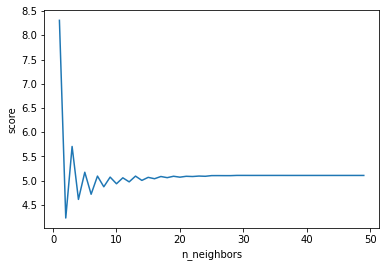

In [24]:
plt.plot(list_nn, list_score)
plt.xlabel('n_neighbors')
plt.ylabel('score')

In [25]:
min(list_score)

4.229387138525418

# K-means

In [63]:
train_x_poutcome

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,score,an_income,pre_total_duration
0,31,7,1,1,0,12294,1,0,0,21,8,101,3,498,0,1.0,135234,0
1,29,2,2,2,0,43027,0,0,0,22,1,158,2,702,0,2.0,387243,0
2,35,4,1,2,0,12252,1,0,0,11,8,351,1,826,0,2.0,183780,0
3,31,9,1,1,0,99121,1,1,2,16,7,658,2,120,0,0.0,1090331,0
4,48,10,1,0,0,42005,1,0,1,3,0,177,1,273,0,3.0,1176140,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27095,37,1,1,1,0,26661,1,0,0,27,7,345,4,425,0,1.0,453237,0
27096,35,7,1,1,0,42150,1,0,0,27,7,121,1,719,0,1.0,632250,0
27097,35,7,1,3,0,34531,0,0,0,28,5,177,2,121,0,2.0,517965,0
27098,30,0,2,1,0,99621,1,0,0,27,7,121,1,100,0,2.0,996210,0


In [26]:
cust_array = np.array([train_x_poutcome['age'].tolist(),
                     train_x_poutcome['job'].tolist(),
                     train_x_poutcome['marital'].tolist(),
                     train_x_poutcome['education'].tolist(),
                     train_x_poutcome['default'].tolist(),
                     train_x_poutcome['balance'].tolist(),
                     train_x_poutcome['housing'].tolist(),
                     train_x_poutcome['loan'].tolist(),
                     train_x_poutcome['contact'].tolist(),
                     train_x_poutcome['day'].tolist(),
                     train_x_poutcome['month'].tolist(),
                     train_x_poutcome['duration'].tolist(),
                     train_x_poutcome['campaign'].tolist(),
                     train_x_poutcome['pdays'].tolist(),
                     train_x_poutcome['previous'].tolist(),
                     train_x_poutcome['score'].tolist(),
                     train_x_poutcome['an_income'].tolist(),
                     train_x_poutcome['pre_total_duration'].tolist()])

In [27]:
cust_array = cust_array.T

In [28]:
pred = KMeans(n_clusters=4).fit_predict(cust_array)

In [56]:
score = log_loss(train_y,pred)
print(score)

ValueError: y_true and y_pred contain different number of classes 4, 2. Please provide the true labels explicitly through the labels argument. Classes found in y_true: [0 1 2 3]

In [55]:
pred = pd.Series(pred)

pred.value_counts()

2    10612
0    10337
3     4721
1     1430
dtype: int64

In [64]:
scaler = StandardScaler()
scaler.fit(train_x_poutcome)
tr_x = scaler.transform(train_x_poutcome)
cust_array = []
for i in range (train_x_poutcome.shape[1]):
    list_s = train_x_poutcome.iloc[:,i].tolist()
    cust_array.append(list_s)
    
cust_array = np.array(cust_array)
cust_array = cust_array.T
model = KMeans(n_clusters = 4)
pred = model.fit_predict(cust_array)

In [67]:
train_y.value_counts()

3    23099
0     2717
1      826
2      458
Name: poutcome, dtype: int64

In [68]:
pred = pd.Series(pred)
pred.value_counts()

0    10641
1    10327
3     4704
2     1428
dtype: int64

In [66]:
score = log_loss(train_y,pred)
print(score)

ValueError: y_true and y_pred contain different number of classes 4, 2. Please provide the true labels explicitly through the labels argument. Classes found in y_true: [0 1 2 3]